# Linear Regression

In [1]:
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
df.to_csv('data/test.csv', index=False) # Save Locally

NameError: name 'pd' is not defined

m(Slope) = [1.93939394]
b(Intercept) = [4.73333333]


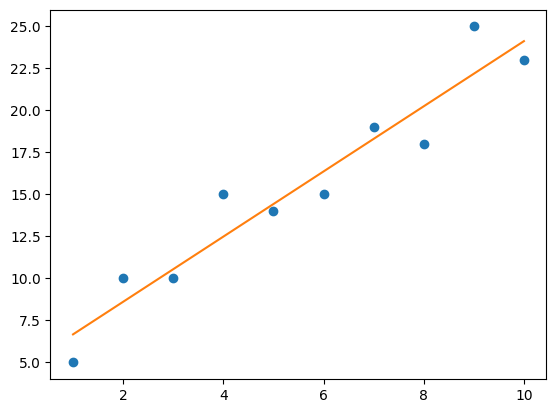

In [2]:
# Example 5-1. Using scikit-learn to do a linear regression 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
# df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
# df.to_csv('data/test.csv', index=False) # Save Locally

df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.7867224, b = -16.51923513
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m(Slope) = {0}".format(m))
print("b(Intercept) = {0}".format(b))

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()


In [3]:
# Example 5-2. Calculating the residuals for a given line and data 
import pandas as pd

# Import points
# points = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",").itertuples()
points = pd.read_csv('data/test.csv', delimiter=",").itertuples()# Get Locally saved data.

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the residuals
print('The residuals for each point.')
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual = y_actual - y_predict
    print(residual)


The residuals for each point.
-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [4]:
# Example 5-4. Calculating the sum of squares for a given line and data 
import pandas as pd

# Import points
# points = pd.read_csv("https://bit.ly/2KF29Bd").itertuples()
points = pd.read_csv('data/test.csv', delimiter=",").itertuples()# Get Locally saved data.

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# calculate sum of squares
for p in points:
    y_actual = p.y
    y_predict = m*p.x + b
    residual_squared = (y_predict - y_actual)**2
    sum_of_squares += residual_squared

print("sum of squares = {}".format(sum_of_squares))
# sum of squares = 28.096969704500005

sum of squares = 28.096969704500005


Regression
five techniques you can use: 
* closed form
* matrix inversion
* matrix decomposition
* gradient descent
* stochastic gradient descent. 

There are other search algorithms like hill climbing that could be used (and are covered in Appendix A), but we will stick with what’s common.


## Closed Form Equation
This is only for a simple linear regression with one input variable.
Closed form equations tend not to scale well.


In [5]:
# Example 5-5. Calculating m and b for a simple linear regression 
import pandas as pd

# Load the data
# points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
points = list(pd.read_csv('data/test.csv', delimiter=",").itertuples()) # Get Locally saved data.

n = len(points)

m = (n*sum(p.x*p.y for p in points) - sum(p.x for p in points) *
    sum(p.y for p in points)) / (n*sum(p.x**2 for p in points) -
    sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)
# 1.9393939393939394 4.7333333333333325

1.9393939393939394 4.7333333333333325


## Invers Matrix Techniques

In [6]:
# Example 5-6. Using inverse and transposed matrices to fit a linear regression 
import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
# df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Calculate coefficents for slope and intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b) # [1.93939394, 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)


[1.93939394 4.73333333]


## QR Decomposition

In [7]:
# Example 5-7. Using QR decomposition to perform a linear regression 
import pandas as pd
from numpy.linalg import qr, inv
import numpy as np

# Import points
# df = pd.read_csv('https://bit.ly/3goOAnt', delimiter=",")
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1].flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).transpose()

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# calculate coefficents for slope and intercept
# using QR decomposition
Q, R = qr(X_1)
b = inv(R).dot(Q.transpose()).dot(Y)

print(b) # [1.93939394, 4.73333333]

[1.93939394 4.73333333]


## Gradient Descent

In [8]:
# Example 5-8. Using gradient descent to find the minimum of a parabola 
import random

def f(x):
    return (x - 3) ** 2 + 4

def dx_f(x):
    return 2*(x - 3)

# The learning rate
L = 0.001

# The number of iterations to perform gradient descent
iterations = 100_000

 # start at a random x
x = random.randint(-15,15)

for i in range(iterations):

    # get slope
    d_x = dx_f(x)

    # update x by subtracting the (learning rate) * (slope)
    x -= L * d_x
    
print(x, f(x)) # prints 2.999999999999889 4.0

2.999999999999889 4.0


In [9]:
# Example 5-9. Performing gradient descent for a linear regression 
import pandas as pd

# Import points from CSV
# points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

n = float(len(points))  # Number of elements in X

# Perform Gradient Descent
for i in range(iterations):

    # slope with respect to m
    D_m = sum(2 * p.x * ((m * p.x + b) - p.y) for p in points)

    # slope with respect to b
    D_b = sum(2 * ((m * p.x + b) - p.y) for p in points)

    # update m and b
    m -= L * D_m
    b -= L * D_b

print("y = {0}x + {1}".format(m, b))
# y = 1.9393939393939548x + 4.733333333333227


y = 1.9393939393939548x + 4.733333333333227


In [10]:
# Example 5-10. Calculating partial derivatives for m and b 
from sympy import *

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m)
d_b = diff(sum_of_squares, b)
print(d_m)
print(d_b)

# OUTPUTS
# Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
# Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


Sum(2*(b + m*x(i) - y(i))*x(i), (i, 0, n))
Sum(2*b + 2*m*x(i) - 2*y(i), (i, 0, n))


In [11]:
# Example 5-11. Solving linear regression using SymP 
import pandas as pd
from sympy import *

# Import points from CSV
# points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
points = list(pd.read_csv('data/test.csv', delimiter=",").itertuples()) # Get Locally saved data.

m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n))

d_m = diff(sum_of_squares, m) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

d_b = diff(sum_of_squares, b) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

# compile using lambdify for faster computation
d_m = lambdify([m, b], d_m)
d_b = lambdify([m, b], d_b)

# Building the model
m = 0.0
b = 0.0

# The learning Rate
L = .001

# The number of iterations
iterations = 100_000

# Perform Gradient Descent
for i in range(iterations):

    # update m and b
    m -= d_m(m,b) * L
    b -= d_b(m,b) * L

print("y = {0}x + {1}".format(m, b))
# y = 1.939393939393954x + 4.733333333333231


y = 1.939393939393954x + 4.733333333333231


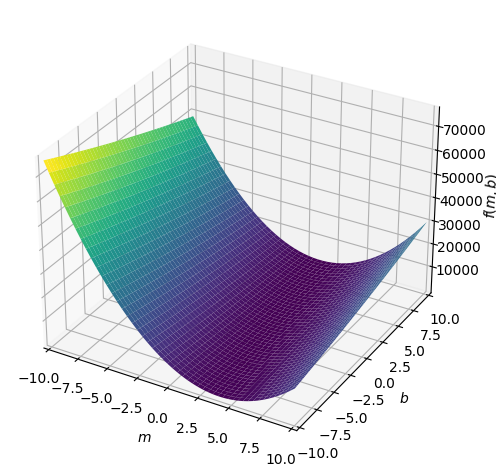

In [12]:
# Example 5-12. Plotting the loss function for linear regression 
from sympy import *
from sympy.plotting import plot3d
import pandas as pd

# points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
points = list(pd.read_csv('data/test.csv', delimiter=",").itertuples()) # Get Locally saved data.
m, b, i, n = symbols('m b i n')
x, y = symbols('x y', cls=Function)

sum_of_squares = Sum((m*x(i) + b - y(i)) ** 2, (i, 0, n)) \
    .subs(n, len(points) - 1).doit() \
    .replace(x, lambda i: points[i].x) \
    .replace(y, lambda i: points[i].y)

plot3d(sum_of_squares)


## Stochastic Gradient Descent


In [13]:
# Example 5-13. Performing stochastic gradient descent for a linear regression 
import pandas as pd
import numpy as np

# Input data
# data = pd.read_csv('https://bit.ly/2KF29Bd', header=0)
data = pd.read_csv('data/test.csv', delimiter=",", header=0) # Get Locally saved data.

X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

n = data.shape[0]  # rows

# Building the model
m = 0.0
b = 0.0

sample_size = 1  # sample size
L = .0001  # The learning Rate
epochs = 1_000_000  # The number of iterations to perform gradient descent

# Performing Stochastic Gradient Descent
for i in range(epochs):
    idx = np.random.choice(n, sample_size, replace=False)
    x_sample = X[idx]
    y_sample = Y[idx]

    # The current predicted value of Y
    Y_pred = m * x_sample + b

    # d/dm derivative of loss function
    D_m = (-2 / sample_size) * sum(x_sample * (y_sample - Y_pred))

    # d/db derivative of loss function
    D_b = (-2 / sample_size) * sum(y_sample - Y_pred)
    m = m - L * D_m  # Update m
    b = b - L * D_b  # Update b

    # print progress
    if i % 10000 == 0:
        print(i, m, b)

print("y = {0}x + {1}".format(m, b))


0 0.006 0.002
10000 2.341707957085635 1.893561570193751
20000 2.203055131910658 2.856170512202371
30000 2.076006562497395 3.4884496571572106
40000 2.044085847082572 3.9164569150145376
50000 1.998867075339317 4.174494696785599
60000 1.9728480509665156 4.351478078026857
70000 1.9833235892746541 4.488393623975137
80000 1.9407192713900887 4.581220857008493
90000 1.9556581121492393 4.610865807616401
100000 1.9458275029535432 4.662847180771141
110000 1.9466305806539068 4.67824677488083
120000 1.9597264296656267 4.695632940579206
130000 1.940662517808785 4.697578944398768
140000 1.9413016630705358 4.689555882256969
150000 1.931422634198237 4.7035444518854055
160000 1.979517242547856 4.733566996824784
170000 1.9462177693023257 4.717837330785514
180000 1.9373030657552561 4.730058728107521
190000 1.9357937868006834 4.7305678996057585
200000 1.9294131119100422 4.699137120951551
210000 1.9265893288622606 4.720384035502208
220000 1.9457810027630549 4.713005572622511
230000 1.967668972977046 4.73576

## The Correlation Coefficient


In [14]:
# Example 5-14. Using Pandas to see the correlation coefficient between every pair of variables 
import pandas as pd

# Read data into Pandas dataframe
# df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")
data = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Print correlations between variables
correlations = df.corr(method='pearson')
print(correlations)

# OUTPUT:
#           x         y
# x  1.000000  0.957586
# y  0.957586  1.000000

          x         y
x  1.000000  0.957586
y  0.957586  1.000000


In [15]:
# Example 5-15. Calculating correlation coefficient from scratch in Python 
import pandas as pd
from math import sqrt

# Import points from CSV
# points = list(pd.read_csv("https://bit.ly/2KF29Bd").itertuples())
points = list(pd.read_csv('data/test.csv', delimiter=",").itertuples()) # Get Locally saved data.
n = len(points)

numerator = n * sum(p.x * p.y for p in points) - \
            sum(p.x for p in points) * sum(p.y for p in points)

denominator = sqrt(n*sum(p.x**2 for p in points) - sum(p.x for p in points)**2) \
              * sqrt(n*sum(p.y**2 for p in points) - sum(p.y for p in points)**2)

corr = numerator / denominator

print(corr)

# OUTPUT:
# 0.9575860952087218


0.9575860952087218


## Statistical Significance


In [16]:
# Example 5-16. Calculating the critical value from a T-distribution 
from scipy.stats import t

n = 10
lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

print(lower_cv, upper_cv)
# -2.262157162740992 2.2621571627409915


-2.262157162740992 2.2621571627409915


In [17]:
# Example 5-17. Testing significance for linear-looking data 
from scipy.stats import t
from math import sqrt

# sample size
n = 10

lower_cv = t(n-1).ppf(.025)
upper_cv = t(n-1).ppf(.975)

# correlation coefficient
# derived from data https://bit.ly/2KF29Bd
r = 0.957586

# Perform the test
test_value = r / sqrt((1-r**2) / (n-2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n-1).cdf(test_value)
else:
    p_value = t(n-1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))


TEST VALUE: 9.399564671312076
CRITICAL RANGE: -2.262157162740992, 2.2621571627409915
CORRELATION PROVEN, REJECT H0
P-VALUE: 5.9763860877914965e-06


The test value here is approximately 9.39956, which is definitely outside the range of (–2.262, 2.262) so we can reject the null hypothesis and say our correlation is real. That’s because the p-value is remarkably significant: .000005976. This is well below our .05 threshold, so this is virtually not coincidence: there is a correlation. It makes sense the p-value is so small because the points strongly resemble a line. It is highly unlikely these points randomly arranged themselves near a line this closely by chance.


## Coefficient of Determination

In [18]:
# Example 5-18. Creating a correlation matrix in Pandas 
import pandas as pd

# Read data into Pandas dataframe
# df = pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",")
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.
# Print correlations between variables
coeff_determination = df.corr(method='pearson') ** 2
print(coeff_determination)

# OUTPUT:
#           x         y
# x  1.000000  0.916971
# y  0.916971  1.000000

          x         y
x  1.000000  0.916971
y  0.916971  1.000000


## Standard Error of the Estimate

In [19]:
# Example 5-19. Calculating the standard error of the estimate Here is how we calculate it in Python:

import pandas as pd
from math import sqrt

# Load the data
# points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
points = list(pd.read_csv('data/test.csv', delimiter=",").itertuples()) # Get Locally saved data.

n = len(points)

# Regression line
m = 1.939
b = 4.733

# Calculate Standard Error of Estimate
S_e = sqrt((sum((p.y - (m*p.x +b))**2 for p in points))/(n-2))

print(S_e)
# 1.87406793500129

1.87406793500129


## Prediction Intervals

In [20]:
# Example 5-20. Calculating a prediction interval of vet visits for a dog that’s 8.5 years old 
import pandas as pd
from scipy.stats import t
from math import sqrt

# Load the data
# points = list(pd.read_csv('https://bit.ly/2KF29Bd', delimiter=",").itertuples())
points = list(pd.read_csv('data/test.csv', delimiter=",").itertuples()) # Get Locally saved data.

n = len(points)

# Linear Regression Line
m = 1.939
b = 4.733

# Calculate Prediction Interval for x = 8.5
x_0 = 8.5
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
                            sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)
# 16.462516875955465 25.966483124044537



16.462516875955465 25.966483124044537


## Train/Test Splits

In [21]:
# Example 5-21. Doing a train/test split on linear regression 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Load the data
# df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Separate training and testing data
# This leaves a third of the data out for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r^2: %.3f" % result)


r^2: 0.864


In [22]:
# Example 5-22. Using three-fold cross-validation for a linear regression 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# df = pd.read_csv('https://bit.ly/3cIH97A', delimiter=",")
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))


[0.82514286 0.64591573 0.2975653 ]
MSE: mean=0.590 (stdev-0.219)


In [23]:
# Example 5-23. Using a random-fold validation for a linear regression 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit

# df = pd.read_csv('https://bit.ly/38XwbeB', delimiter=",")
df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = ShuffleSplit(n_splits=10, test_size=.33, random_state=7)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))


[0.82514286 0.23552344 0.92653455 0.91620594 0.73260142 0.8698865
 0.55254014 0.89593526 0.91570078 0.82086621]
mean=0.769 (stdev-0.208)


## Multiple Linear Regression


In [24]:
# Example 5-24. A linear regression with two input variables 
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv('https://bit.ly/2X1HWH7', delimiter=",")
# df = pd.read_csv('data/test.csv', delimiter=",") # Get Locally saved data.

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Training
fit = LinearRegression().fit(X, Y)

# Print coefficients
print("Coefficients = {0}".format(fit.coef_))
print("Intercept = {0}".format(fit.intercept_))
print("z = {0} + {1}x + {2}y".format(fit.intercept_, fit.coef_[0], fit.coef_[1]))


Coefficients = [2.00672647 3.00203798]
Intercept = 20.109432820035977
z = 20.109432820035977 + 2.006726472512806x + 3.002037976646692y


# Exercises 

1.  Perform a simple linear regression to find the m and b values that minimizes the loss (sum of squares).

Answer:
The slope is 1.75919315 and the intercept is 4.69359655.

In [65]:
# A dataset of two variables, x and y, is provided here.
# df = pd.read_csv('https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/regression/linear_normal.csv', delimiter=",")

m = [1.75919315]
b = [4.69359655]


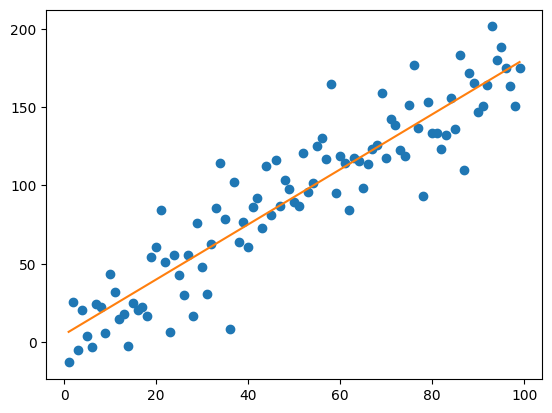

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)
Y = df.values[:, -1]

# Fit a line to the points
fit = LinearRegression().fit(X, Y)

# m = 1.75919315, b = 4.69359655
m = fit.coef_.flatten()
b = fit.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

# show in chart
plt.plot(X, Y, 'o') # scatterplot
plt.plot(X, m*X+b) # line
plt.show()


2. Calculate the correlation coefficient and statistical significance of this data (at 95% confidence). Is the correlation useful? 

Answer:
We get a high correlation of 0.92421 and a test value of 23.8355 with a statistically significant range of ±1.9844. This correlation is definitely useful and statistically significant. The code is as follows:

In [68]:
import pandas as pd

# Read data into Pandas dataframe
df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Print correlations between variables
correlations = df.corr(method='pearson')
print(correlations)

# OUTPUT:
#          x        y
# x  1.00000  0.92421
# y  0.92421  1.00000

# Test for statistical significance
from scipy.stats import t
from math import sqrt

# sample size
n = df.shape[0]
print(n)
lower_cv = t(n - 1).ppf(.025)
upper_cv = t(n - 1).ppf(.975)

# retrieve correlation coefficient
r = correlations["y"]["x"]

# Perform the test
test_value = r / sqrt((1 - r ** 2) / (n - 2))

print("TEST VALUE: {}".format(test_value))
print("CRITICAL RANGE: {}, {}".format(lower_cv, upper_cv))

if test_value < lower_cv or test_value > upper_cv:
    print("CORRELATION PROVEN, REJECT H0")
else:
    print("CORRELATION NOT PROVEN, FAILED TO REJECT H0 ")

# Calculate p-value
if test_value > 0:
    p_value = 1.0 - t(n - 1).cdf(test_value)
else:
    p_value = t(n - 1).cdf(test_value)

# Two-tailed, so multiply by 2
p_value = p_value * 2
print("P-VALUE: {}".format(p_value))

"""
TEST VALUE: 23.835515323677328
CRITICAL RANGE: -1.9844674544266925, 1.984467454426692
CORRELATION PROVEN, REJECT H0
P-VALUE: 0.0 (extremely small)
"""


         x        y
x  1.00000  0.92421
y  0.92421  1.00000
99
TEST VALUE: 23.835515323677328
CRITICAL RANGE: -1.9844674544266925, 1.984467454426692
CORRELATION PROVEN, REJECT H0
P-VALUE: 0.0


'\nTEST VALUE: 23.835515323677328\nCRITICAL RANGE: -1.9844674544266925, 1.984467454426692\nCORRELATION PROVEN, REJECT H0\nP-VALUE: 0.0 (extremely small)\n'

3. If I predict where x = 50, what is the 95% prediction interval for the predicted value of y? 

Answer:
At $x = 50$ , the prediction interval is between 50.79 and 134.51. The code is as follows:

In [69]:
import pandas as pd
from scipy.stats import t
from math import sqrt

# Load the data
points = list(pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",") \
    .itertuples())

n = len(points)

# Linear Regression Line
m = 1.75919315
b = 4.69359655

# Calculate Prediction Interval for x = 50
x_0 = 50
x_mean = sum(p.x for p in points) / len(points)

t_value = t(n - 2).ppf(.975)

standard_error = sqrt(sum((p.y - (m * p.x + b)) ** 2 for p in points) / \
    (n - 2))

margin_of_error = t_value * standard_error * \
                  sqrt(1 + (1 / n) + (n * (x_0 - x_mean) ** 2) / \
                       (n * sum(p.x ** 2 for p in points) - \
   sum(p.x for p in points) ** 2))

predicted_y = m*x_0 + b

# Calculate prediction interval
print(predicted_y - margin_of_error, predicted_y + margin_of_error)
# 50.792086501055955 134.51442159894404

50.792086501055955 134.51442159894404


4. Start your regression over and do a train/test split. Feel free to experiment with cross-validation and random-fold validation. Does the linear regression perform well and consistently on the testing data? Why or why not?

Answer:
The testing datasets do moderately well when split into thirds and evaluated with k-fold, where k = 3. You will get a mean of roughly 0.83 in MSE and a standard deviation of 0.03 across the three datasets.

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://bit.ly/3C8JzrM', delimiter=",")

# Extract input variables (all rows, all columns but last column)
X = df.values[:, :-1]

# Extract output column (all rows, last column)\
Y = df.values[:, -1]

# Perform a simple linear regression
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean=%.3f (stdev-%.3f)" % (results.mean(), results.std()))
"""
[0.86119665 0.78237719 0.85733887]
MSE: mean=0.834 (stdev-0.036)
"""

[0.86119665 0.78237719 0.85733887]
MSE: mean=0.834 (stdev-0.036)


'\n[0.86119665 0.78237719 0.85733887]\nMSE: mean=0.834 (stdev-0.036)\n'